In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

/Users/dharv/Desktop/Jordan Belfort/.venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
def RSI(data, window=14, adjust=False):
    delta = data['Close'].diff(1).dropna()
    loss = delta.copy()
    gains = delta.copy()

    gains[gains < 0] = 0
    loss[loss > 0] = 0

    gain_ewm = gains.ewm(com=window - 1, adjust=adjust).mean()
    loss_ewm = abs(loss.ewm(com=window - 1, adjust=adjust).mean())

    RS = gain_ewm / loss_ewm
    RSI = 100 - 100 / (1 + RS)

    return RSI

In [3]:
microsoft_data = yf.download('MSFT', start='2021-09-01', end='2023-07-01',interval='1h')

[*********************100%***********************]  1 of 1 completed


In [4]:
microsoft_data_close = microsoft_data['Close'].to_numpy()
microsoft_data_open = microsoft_data['Open'].to_numpy()
microsoft_data_average = (microsoft_data_close + microsoft_data_open)/2
microsoft_data.insert(1, 'Average', microsoft_data_average)
microsoft_data

,Open,Average,High,Low,Close,Adj Close,Volume
Datetime,,,,,,,
2021-09-01 09:30:00-04:00,302.864990,303.517502,305.190002,302.679993,304.170013,304.170013,4979920
2021-09-01 10:30:00-04:00,304.160004,303.900009,304.350006,303.299988,303.640015,303.640015,1947457
2021-09-01 11:30:00-04:00,303.635010,303.369049,304.019989,303.079987,303.103088,303.103088,1472283
2021-09-01 12:30:00-04:00,303.100006,303.180008,303.376404,302.600006,303.260010,303.260010,1783499
2021-09-01 13:30:00-04:00,303.239990,303.110001,303.420013,302.940002,302.980011,302.980011,1219838
...,...,...,...,...,...,...,...
2023-06-30 11:30:00-04:00,341.100006,340.725006,341.130005,339.660004,340.350006,340.350006,2106315
2023-06-30 12:30:00-04:00,340.390015,340.505005,341.470001,340.290009,340.619995,340.619995,1643511
2023-06-30 13:30:00-04:00,340.609985,340.764999,341.070007,340.269989,340.920013,340.920013,1375940


In [5]:
change = microsoft_data['Close'].diff()
change.dropna(inplace = True)

change_up = change.copy()
change_down = change.copy()

change_up[change_up < 0] = 0
change_down[change_down > 0] = 0

change.equals(change_up+change_down)

True

In [6]:
avg_up = change_up.rolling(14).mean()
avg_down = change_down.rolling(14).mean().abs()

In [7]:
rsi = 100 * avg_up / (avg_up + avg_down)

In [8]:
rsi

Datetime
2021-09-01 10:30:00-04:00          NaN
2021-09-01 11:30:00-04:00          NaN
2021-09-01 12:30:00-04:00          NaN
2021-09-01 13:30:00-04:00          NaN
2021-09-01 14:30:00-04:00          NaN
                               ...    
2023-06-30 11:30:00-04:00    59.420641
2023-06-30 12:30:00-04:00    63.615524
2023-06-30 13:30:00-04:00    63.372760
2023-06-30 14:30:00-04:00    67.472184
2023-06-30 15:30:00-04:00    62.359563
Name: Close, Length: 3211, dtype: float64

In [9]:
rsi.dropna(inplace=True)
rsi

Datetime
2021-09-03 09:30:00-04:00    26.326784
2021-09-03 10:30:00-04:00    38.365926
2021-09-03 11:30:00-04:00    39.506206
2021-09-03 12:30:00-04:00    39.943004
2021-09-03 13:30:00-04:00    39.056540
                               ...    
2023-06-30 11:30:00-04:00    59.420641
2023-06-30 12:30:00-04:00    63.615524
2023-06-30 13:30:00-04:00    63.372760
2023-06-30 14:30:00-04:00    67.472184
2023-06-30 15:30:00-04:00    62.359563
Name: Close, Length: 3198, dtype: float64

In [10]:
# Calculate 12-day and 26-day EMAs
ema_12 = microsoft_data['Average'].ewm(span=12, adjust=False).mean()
ema_26 = microsoft_data['Average'].ewm(span=26, adjust=False).mean()

# Calculate MACD line
macd_line = ema_12 - ema_26

# Calculate 9-day EMA of MACD (Signal line)
signal_line = macd_line.ewm(span=9, adjust=False).mean()

# Calculate whether Signal is above MACD
signal_above_macd = (signal_line > macd_line).astype(int)

# Print the MACD, Signal, and Signal above MACD values
microsoft_data.insert(1,'MACD_Value', macd_line)
microsoft_data.insert(1,'Signal_Value', signal_line)
microsoft_data.insert(1,'Signal_MACD_strength',signal_above_macd)

In [11]:
Moving_window = 5*8
ma = microsoft_data['Average'].rolling(window = Moving_window).mean()
microsoft_data.insert(1, 'Moving Average', ma)
ma_slope = microsoft_data['Moving Average'].diff()/Moving_window
tangent_inverse = np.arctan(ma_slope)
normalization_factor = np.pi/2
normalized_tangent_inverse = tangent_inverse / normalization_factor

In [12]:
microsoft_data.insert(1, 'Normalized Moving Average Slope', normalized_tangent_inverse)

In [13]:
microsoft_data.insert(1,'RSI', rsi)

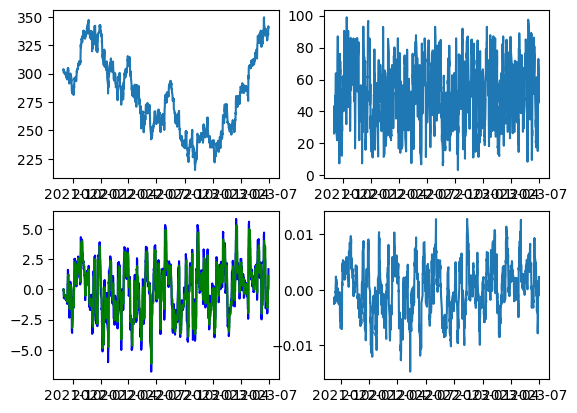

In [14]:
fig = plt.figure()
ax0 = plt.subplot(221)
ax1 = plt.subplot(222)
ax2 = plt.subplot(223)
ax3 = plt.subplot(224)
#ax4 = plt.subplot(235)
ax0.plot(microsoft_data['Average'])
ax1.plot(microsoft_data['RSI'])
ax2.plot(microsoft_data['MACD_Value'], color = 'blue')
ax2.plot(microsoft_data['Signal_Value'], color = 'green')
ax3.plot(microsoft_data['Normalized Moving Average Slope'])
#ax4.plot(microsoft_data['Signal_MACD_strength'])